Best Position (Solution): [1 2 4 5 7 0 6 3]
Clashes: 2


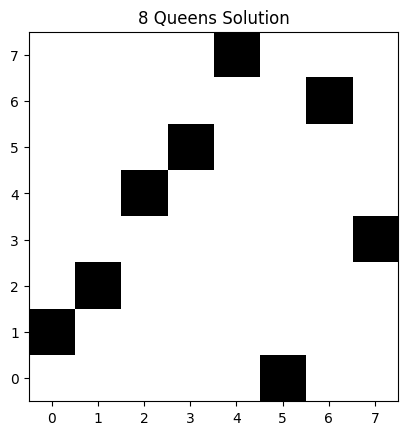

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, n):
        self.position = np.random.permutation(n)
        self.velocity = np.zeros(n)  # Start with zero velocity
        self.best_position = self.position.copy()
        self.best_value = float('inf')

def fitness(position):
    n = len(position)
    clashes = 0
    for i in range(n):
        for j in range(i + 1, n):
            if abs(position[i] - position[j]) == abs(i - j):
                clashes += 1
    return clashes

def update_velocity(particle, global_best_position, w=0.5, c1=1, c2=1):
    r1, r2 = random.random(), random.random()
    cognitive = c1 * r1 * (particle.best_position - particle.position)
    social = c2 * r2 * (global_best_position - particle.position)
    particle.velocity = w * particle.velocity + cognitive + social
    particle.velocity = np.clip(particle.velocity, -1, 1)  # Limit velocity

def update_position(particle):
    particle.position = np.clip(particle.position + np.round(particle.velocity).astype(int), 0, len(particle.position) - 1)

    # Ensure unique positions
    unique_positions = np.unique(particle.position)
    while len(unique_positions) < len(particle.position):
        new_position = random.randint(0, len(particle.position) - 1)
        if new_position not in unique_positions:
            unique_positions = np.append(unique_positions, new_position)
    particle.position = unique_positions[:len(particle.position)]

def pso(n, num_particles=30, max_iter=100):
    swarm = [Particle(n) for _ in range(num_particles)]
    global_best_position = None
    global_best_value = float('inf')

    for _ in range(max_iter):
        for particle in swarm:
            current_value = fitness(particle.position)
            if current_value < particle.best_value:
                particle.best_value = current_value
                particle.best_position = particle.position.copy()
            if current_value < global_best_value:
                global_best_value = current_value
                global_best_position = particle.position.copy()

        for particle in swarm:
            update_velocity(particle, global_best_position)
            update_position(particle)

    return global_best_position, global_best_value

def display_board(solution):
    n = len(solution)
    board = np.zeros((n, n))
    for i in range(n):
        board[int(solution[i]), i] = 1  # 1 represents a queen's position

    plt.imshow(board, cmap='binary')
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.title('8 Queens Solution')
    plt.gca().invert_yaxis()
    plt.show()

n = 8
solution, value = pso(n)
print("Best Position (Solution):", solution)
print("Clashes:", value)

display_board(solution)